In [1]:
#@title ## Download Kaggle Dataset
#@markdown Dataset: Annotated Corpus for Named Entity Recognition <br>
#@markdown [https://www.kaggle.com/therohk/million-headlines](https://www.kaggle.com/therohk/million-headlines)
#@markdown <br><br>
#@markdown News headlines published over a period of seventeen years.
#@markdown <br><br>
#@markdown Setup your [Kaggle API](https://www.kaggle.com/docs/api) access to download the dataset.
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d therohk/million-headlines
!unzip -o /content/million-headlines

 44% 9.00M/20.2M [00:00<00:00, 15.9MB/s]
100% 20.2M/20.2M [00:00<00:00, 31.9MB/s]
Archive:  /content/million-headlines.zip
  inflating: abcnews-date-text.csv   


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import functools

import matplotlib.pylab as plt

from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

print("tensorflow      ", tf.__version__)
print("pandas          ", pd.__version__)
print("numpy           ", np.__version__)
print("matplotlib.pylab", plt.__version__)

tensorflow       2.4.0
pandas           1.1.5
numpy            1.19.5
matplotlib.pylab 1.19.5


In [3]:
headlines = pd.read_csv("abcnews-date-text.csv")["headline_text"]
headlines[0]

'aba decides against community broadcasting licence'

In [4]:
window = [tuple([h[i], h[i+1], h[i+2]]) for h in headlines[:10000] for i in range(len(h) - 2)]
window = pd.DataFrame(window)
vocab = window[0].unique()
vocab = {v: i for i, v in enumerate(vocab)}
X = window.iloc[:,:2].applymap(lambda t: vocab[t]).to_numpy()
y = window.iloc[:,-1:].applymap(lambda t: vocab[t]).to_numpy()

X.shape, y.shape 

((376880, 2), (376880, 1))

In [5]:
vocab_size = len(vocab)
embedding_dim = 2

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=2, name="embedding"),
    Flatten(),
    Dense(vocab_size, activation="softmax")
])

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

output_array = model.get_layer("embedding")(X)
output_array.shape

TensorShape([376880, 2, 2])

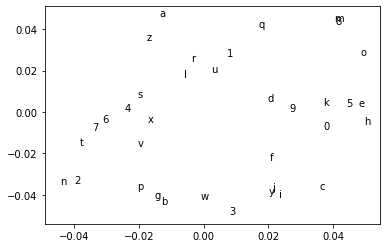

In [6]:
import matplotlib.pylab as plt

idx_to_calc = list(vocab.values())
idx_to_calc = np.array([idx_to_calc, idx_to_calc]).T

translator = {v:k for k,v in vocab.items()}
preds = model.get_layer("embedding")(idx_to_calc)

plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])


In [7]:
from sklearn.preprocessing import OneHotEncoder

y_one_hot = OneHotEncoder(sparse=False).fit_transform(y)
model.fit(X, y_one_hot, epochs=30, verbose=1)

Epoch 1/30
11778/11778 [==============================] - 29s 2ms/step - loss: 2.8283 - accuracy: 0.1874
Epoch 2/30
11778/11778 [==============================] - 28s 2ms/step - loss: 2.5850 - accuracy: 0.2303
Epoch 3/30
11778/11778 [==============================] - 28s 2ms/step - loss: 2.5804 - accuracy: 0.2304
Epoch 4/30
11778/11778 [==============================] - 28s 2ms/step - loss: 2.5754 - accuracy: 0.2297
Epoch 5/30
11778/11778 [==============================] - 27s 2ms/step - loss: 2.5785 - accuracy: 0.2292
Epoch 6/30
11778/11778 [==============================] - 28s 2ms/step - loss: 2.5718 - accuracy: 0.2315
Epoch 7/30
11778/11778 [==============================] - 27s 2ms/step - loss: 2.5725 - accuracy: 0.2296
Epoch 8/30
11778/11778 [==============================] - 28s 2ms/step - loss: 2.5785 - accuracy: 0.2290
Epoch 9/30
11778/11778 [==============================] - 27s 2ms/step - loss: 2.5756 - accuracy: 0.2291
Epoch 10/30
11778/11778 [==============================

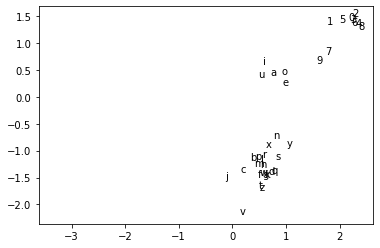

In [9]:
preds = model.get_layer("embedding")(idx_to_calc)
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])